# 0. Installs and imports

In [17]:
import pandas as pd
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import *

In [14]:
%matplotlib inline

# 1. Variables

In [2]:
preprocessed_data_path = "../data/02_preprocessed"
save_data_path = ""

# 2. Load Data

In [3]:
df_train = pd.read_parquet(f"{preprocessed_data_path}/train_preprocessed.parquet")

In [4]:
n_rows = len(df_train.index)
n_cols = len(df_train.columns)
print(f"Dataset has {n_rows} rows and {n_cols} columns.")

Dataset has 891 rows and 11 columns.


In [5]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
5,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


# 3. EDA

In [6]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


In [7]:
ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. Scaling

In [8]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
5,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
888,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
889,0,3,28.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0


In [12]:
matplotlib.use('Qt5Agg')

/var/folders/q_/ltxmn1mn71g86m3lzjtw4xzr0000gn/T/ipykernel_62313/1392298976.py:1: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('Qt5Agg')


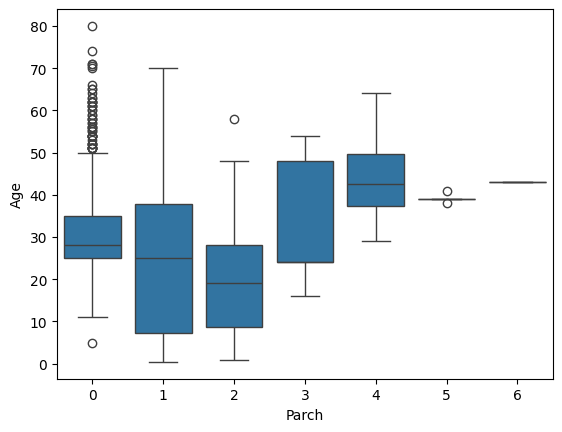

In [16]:
sns.boxplot(df_train,x="Parch",y="Age")
plt.show()

In [22]:
jarque_bera(df_train["Age"].to_numpy(),nan_policy = "omit")

SignificanceResult(statistic=np.float64(74.30141336122826), pvalue=np.float64(7.339273799137967e-17))

<Axes: >

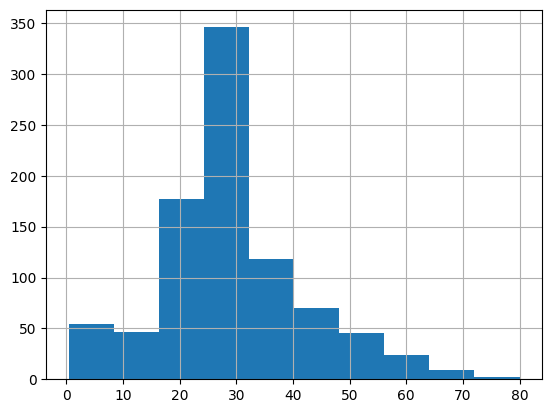

In [23]:
df_train["Age"].hist()